### Modern Portfolio Theory

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
stock_path = 'stock_price'
df = pd.DataFrame()
for file in os.listdir(stock_path):
    # Derive the symbol from the filename
    symbol = file.split('.')[0]

    # Load the data
    path = os.path.join(stock_path, file)
    df_stock = pd.read_csv(path)

    # Set the Date as index column
    df_stock['Date'] = pd.to_datetime(df_stock['Date'])
    df_stock = df_stock.set_index('Date')

    # Resample based on months and compute the changes
    resampled = df_stock.resample('BM')
    monthly = resampled.apply(lambda x: x[-1])
    df[symbol] = monthly['Open'].pct_change()

In [3]:
df = df.dropna()

Text(0.5,1,'Expected Return versus Risk')

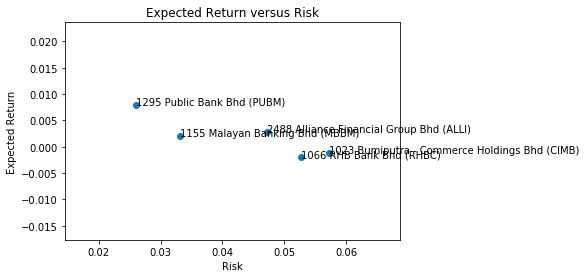

In [4]:
# Make the plot
x = df.std().tolist()
y = df.mean().tolist()
symbols = df.columns

# Scatterplot and annotation
plt.scatter(x, y)
for index, symbol in enumerate(symbols):
    plt.annotate(symbol, (x[index], y[index]))

# Title and axis
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Expected Return versus Risk')


### Decision Tree for best stock price

In [5]:
import talib as ta

In [10]:
df = pd.read_csv(r'stock_price/1295 Public Bank Bhd (PUBM).csv')

In [11]:
df = df.dropna().copy()

In [12]:
df.head()

,Unnamed: 0,Date,Close,Open,High,Low,Volume,Change
0,0,2011-07-15,13.38,13.40,13.40,13.36,3510000.0,0.002999
1,1,2011-07-18,13.34,13.36,13.36,13.32,2180000.0,0.003008
2,2,2011-07-19,13.30,13.34,13.34,13.28,1320000.0,-0.005979
3,3,2011-07-20,13.38,13.30,13.40,13.28,3630000.0,0.001497
4,4,2011-07-21,13.36,13.40,13.40,13.34,1860000.0,-0.004471


In [13]:
import talib as ta
df['EMA10'] = ta.EMA(df['Close'].values, timeperiod=10)
df['EMA30'] = ta.EMA(df['Close'].values, timeperiod=30)
df['ATR'] = ta.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
df['ADX'] = ta.ADX(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14)
df['RSI'] = ta.RSI(df['Close'].values, timeperiod=14)
macd, macdsignal, macdhist = ta.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACDsignal'] = macdsignal
df.tail()

,Unnamed: 0,Date,Close,Open,High,Low,Volume,Change,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal
1862,1862,2019-02-22,24.98,24.92,25.02,24.90,12020000.0,-0.001599,24.972489,24.891292,0.193326,27.563100,54.445425,0.058980,0.054057
1863,1863,2019-02-25,25.02,25.00,25.06,24.90,6150000.0,-0.001596,24.981127,24.899596,0.190946,25.905927,56.391436,0.059196,0.055085
1864,1864,2019-02-26,25.06,25.02,25.08,24.88,5840000.0,0.000000,24.995468,24.909944,0.191593,24.367123,58.309381,0.061881,0.056444
1865,1865,2019-02-27,25.06,25.00,25.08,24.98,5080000.0,0.002400,25.007201,24.919625,0.185050,22.938234,58.309381,0.063280,0.057811
1866,1866,2019-02-28,25.00,25.06,25.08,24.94,6560000.0,-0.000799,25.005892,24.924811,0.181832,21.395372,54.165140,0.058869,0.058023


In [14]:
import numpy as np
df['ClgtEMA10'] = np.where(df['Close'] > df['EMA10'], 1, -1)
df['EMA10gtEMA30'] = np.where(df['EMA10'] > df['EMA30'], 1, -1)
df['MACDSIGgtMACD'] = np.where(df['MACDsignal'] > df['MACD'], 1, -1)
df.tail()

,Unnamed: 0,Date,Close,Open,High,Low,Volume,Change,EMA10,EMA30,ATR,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
1862,1862,2019-02-22,24.98,24.92,25.02,24.90,12020000.0,-0.001599,24.972489,24.891292,0.193326,27.563100,54.445425,0.058980,0.054057,1,1,-1
1863,1863,2019-02-25,25.02,25.00,25.06,24.90,6150000.0,-0.001596,24.981127,24.899596,0.190946,25.905927,56.391436,0.059196,0.055085,1,1,-1
1864,1864,2019-02-26,25.06,25.02,25.08,24.88,5840000.0,0.000000,24.995468,24.909944,0.191593,24.367123,58.309381,0.061881,0.056444,1,1,-1
1865,1865,2019-02-27,25.06,25.00,25.08,24.98,5080000.0,0.002400,25.007201,24.919625,0.185050,22.938234,58.309381,0.063280,0.057811,1,1,-1
1866,1866,2019-02-28,25.00,25.06,25.08,24.94,6560000.0,-0.000799,25.005892,24.924811,0.181832,21.395372,54.165140,0.058869,0.058023,-1,1,-1


In [15]:
df['Return'] = df['Close'].pct_change(1).shift(-1)
df['target_cls'] = np.where(df.Return > 0, 1, 0)
df['target_rgs'] = df['Return']
df.tail()

,Unnamed: 0,Date,Close,Open,High,Low,Volume,Change,EMA10,EMA30,...,ADX,RSI,MACD,MACDsignal,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD,Return,target_cls,target_rgs
1862,1862,2019-02-22,24.98,24.92,25.02,24.90,12020000.0,-0.001599,24.972489,24.891292,...,27.563100,54.445425,0.058980,0.054057,1,1,-1,0.001601,1,0.001601
1863,1863,2019-02-25,25.02,25.00,25.06,24.90,6150000.0,-0.001596,24.981127,24.899596,...,25.905927,56.391436,0.059196,0.055085,1,1,-1,0.001599,1,0.001599
1864,1864,2019-02-26,25.06,25.02,25.08,24.88,5840000.0,0.000000,24.995468,24.909944,...,24.367123,58.309381,0.061881,0.056444,1,1,-1,0.000000,0,0.000000
1865,1865,2019-02-27,25.06,25.00,25.08,24.98,5080000.0,0.002400,25.007201,24.919625,...,22.938234,58.309381,0.063280,0.057811,1,1,-1,-0.002394,0,-0.002394
1866,1866,2019-02-28,25.00,25.06,25.08,24.94,6560000.0,-0.000799,25.005892,24.924811,...,21.395372,54.165140,0.058869,0.058023,-1,1,-1,NaN,0,NaN


In [16]:
df = df.dropna().copy()

In [17]:
predictors_list = ['ATR', 'ADX','RSI', 'ClgtEMA10', 'EMA10gtEMA30', 'MACDSIGgtMACD']
X = df[predictors_list]
X.tail()

,ATR,ADX,RSI,ClgtEMA10,EMA10gtEMA30,MACDSIGgtMACD
1861,0.198967,29.662075,55.597319,1,1,-1
1862,0.193326,27.563100,54.445425,1,1,-1
1863,0.190946,25.905927,56.391436,1,1,-1
1864,0.191593,24.367123,58.309381,1,1,-1
1865,0.185050,22.938234,58.309381,1,1,-1


In [18]:
y_cls = df.target_cls
y_cls.tail()

1861    0
1862    1
1863    1
1864    0
1865    0
Name: target_cls, dtype: int32

In [19]:
y_rgs = df.target_rgs
y_rgs.tail()

1861   -0.000800
1862    0.001601
1863    0.001599
1864    0.000000
1865   -0.002394
Name: target_rgs, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
y=y_cls
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X, y, test_size=0.3, random_state=432, stratify=y)
print (X_cls_train.shape, y_cls_train.shape)

print (X_cls_test.shape, y_cls_test.shape)

(1283, 6) (1283,)
(550, 6) (550,)


In [21]:
train_length = int(len(df)*0.70)
X_rgs_train = X[:train_length]
X_rgs_test = X[train_length:]
y_rgs_train = y_rgs[:train_length]
y_rgs_test = y_rgs[train_length:]
print (X_rgs_train.shape, y_rgs_train.shape)

print (X_rgs_test.shape, y_rgs_test.shape)

(1283, 6) (1283,)
(550, 6) (550,)


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
clf = clf.fit(X_cls_train, y_cls_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
from sklearn import tree
import graphviz

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None,filled=True,feature_names=predictors_list)
graphviz.Source(dot_data)